In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


2023-07-14 16:27:54.027722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Configure

In [2]:
datadir = 'data'
nshowers = 10000

# model and training configuration
epochs = 10
c_layers = [
  (2, 3, None),
  (4, 3, None),
  (8, 3, None),
  (16, 3, None),
  (32, 5, 2),
  (64, 5, 2),
  (128, 5, 2),
]

d_layers = [256, 256]

# cut configuration
cut = xfirst.config.cut.A2

# features
x = xfirst.data.load_depths(datadir, cut).index.to_list()

# target
y = 'Xfirst'

### Load profiles

In [3]:
data = xfirst.data.load_profiles(
  datadir = datadir,
  cut = cut,
  nshowers = nshowers,
  norm = True,
  xfirst = True,
)

### Train the CNN

In [4]:
cnn = xfirst.models.convolutional_network(
  input = (len(x), 1),
  conv_layers = c_layers,
  dense_layers = d_layers,
  epochs = epochs,
).fit(data, x, y)

+ training the model on ['Edep_35', 'Edep_36', 'Edep_37', 'Edep_38', 'Edep_39', 'Edep_40', 'Edep_41', 'Edep_42', 'Edep_43', 'Edep_44', 'Edep_45', 'Edep_46', 'Edep_47', 'Edep_48', 'Edep_49', 'Edep_50', 'Edep_51', 'Edep_52', 'Edep_53', 'Edep_54', 'Edep_55', 'Edep_56', 'Edep_57', 'Edep_58', 'Edep_59', 'Edep_60', 'Edep_61', 'Edep_62', 'Edep_63', 'Edep_64', 'Edep_65', 'Edep_66', 'Edep_67', 'Edep_68', 'Edep_69', 'Edep_70', 'Edep_71', 'Edep_72', 'Edep_73', 'Edep_74', 'Edep_75', 'Edep_76', 'Edep_77', 'Edep_78', 'Edep_79', 'Edep_80', 'Edep_81', 'Edep_82', 'Edep_83', 'Edep_84', 'Edep_85', 'Edep_86', 'Edep_87', 'Edep_88', 'Edep_89', 'Edep_90', 'Edep_91', 'Edep_92', 'Edep_93', 'Edep_94', 'Edep_95', 'Edep_96', 'Edep_97', 'Edep_98', 'Edep_99'] for target Xfirst
Epoch 1/10
1563/1563 [==============================] - 21s 11ms/step - loss: 614.4352 - val_loss: 432.3360 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 371.3490 - val_loss: 321.7094 - lr: 0.0010


2023-07-14 16:28:16.383178: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-07-14 16:28:18.102673: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f9a34013e80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-07-14 16:28:18.102731: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Host, Default Version
2023-07-14 16:28:18.145033: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-14 16:28:19.278978: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### Validation curve

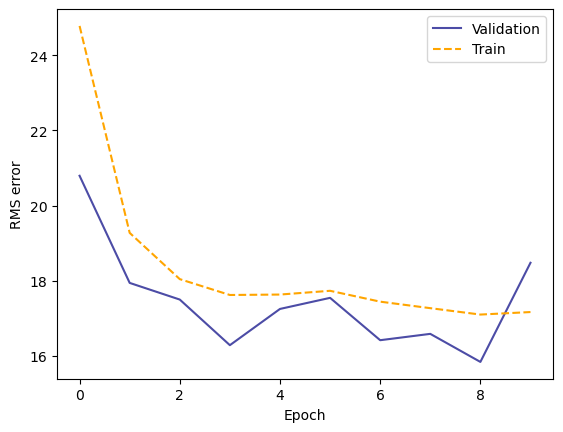

In [5]:
fig = cnn.draw()

### Compute predictions

+ computing predictions
1563/1563 [==============================] - 5s 3ms/step
+ drawing predictions


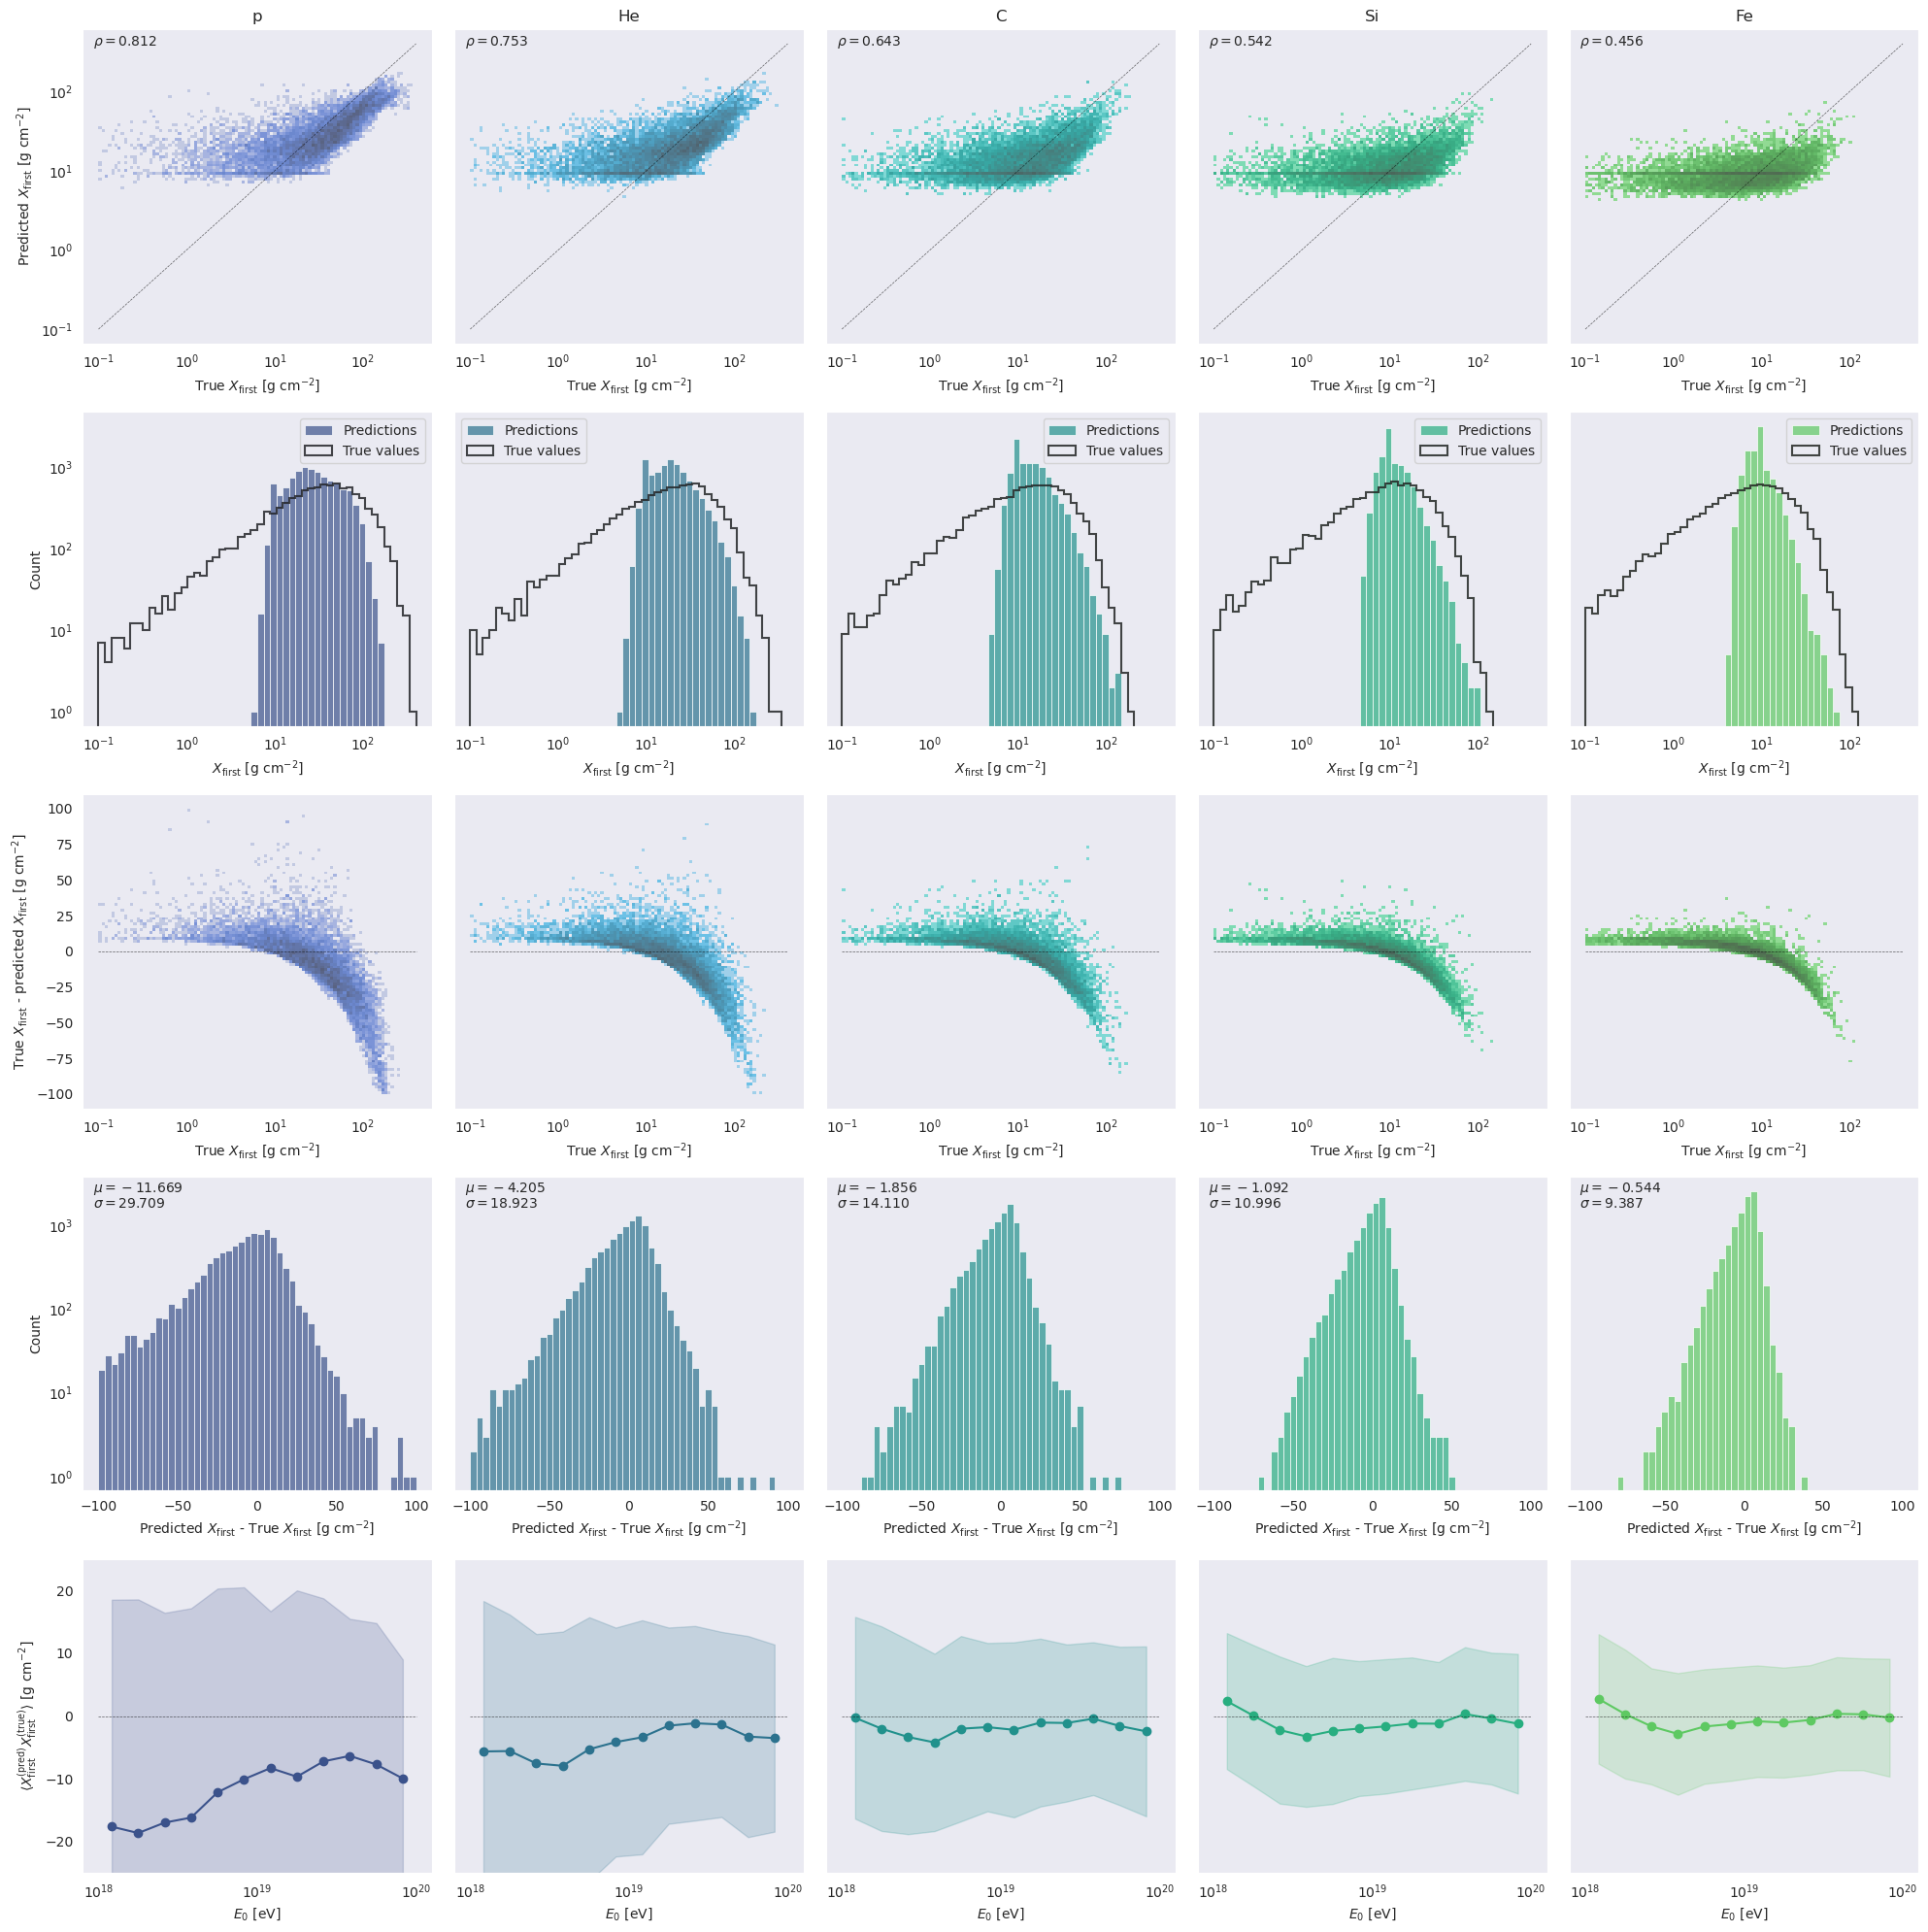

In [6]:
results = cnn.eval(data, plot = True)